# Housing Price Prediction
### Walkthrough Tutorial

In [1]:
# to work with dataframes and arrays
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing functions
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import lightgbm as lgb

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### **data exploration**

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
# all the numerical features
train_df.dtypes[train_df.dtypes!='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

#### some scatter plots

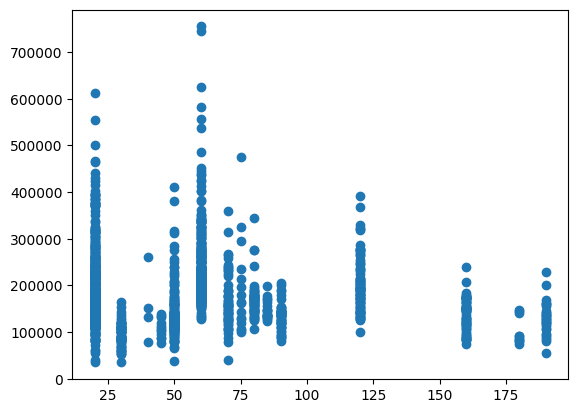

In [6]:
plt.scatter(data = train_df, x = 'MSSubClass', y = 'SalePrice')

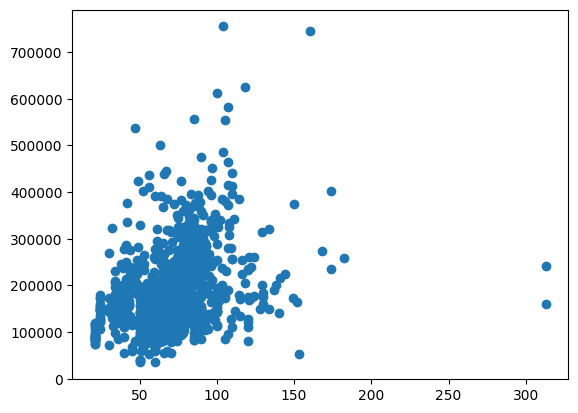

In [7]:
plt.scatter(data = train_df, x = 'LotFrontage', y = 'SalePrice')

In [8]:
train_df.query('LotFrontage > 300')
# Drop 935 and 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934    935          20       RL        313.0    27650   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
934          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
934      11   2008        WD         Normal     242000  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]

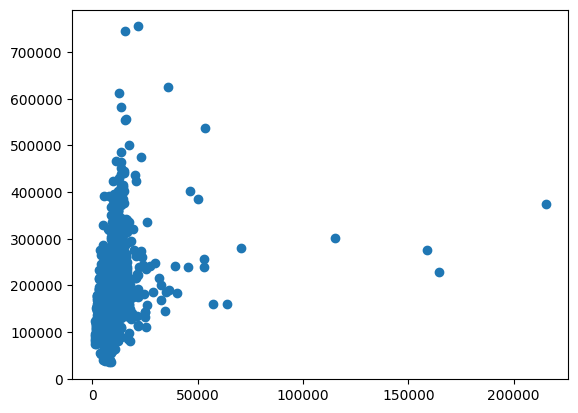

In [9]:
plt.scatter(data = train_df, x = 'LotArea', y = 'SalePrice')

In [10]:
train_df.query('LotArea > 100000')
# Drop 250, 314, 336, 707

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249  250          50       RL          NaN   159000   Pave   NaN      IR2   
313  314          20       RL        150.0   215245   Pave   NaN      IR3   
335  336         190       RL          NaN   164660   Grvl   NaN      IR1   
706  707          20       RL          NaN   115149   Pave   NaN      IR2   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
249         Low    AllPub  ...        0    NaN   NaN        Shed     500   
313         Low    AllPub  ...        0    NaN   NaN         NaN       0   
335         HLS    AllPub  ...        0    NaN   NaN        Shed     700   
706         Low    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
249      6   2007        WD         Normal     277000  
313      6   2009        WD         Normal     375000  
335      8   2008        WD         Normal     228950  
706      6   2007        WD         Normal     302000  

[4 rows x 81 columns]

#### z-score outliers

In [11]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)
# Note that left column is 0-indexed. Drop any z scores that look like outliers
# Drop 314, 336, 250, 707, 452, 1299, and maybe 1397

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

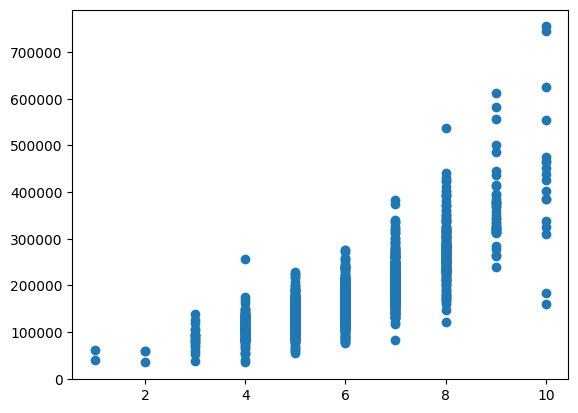

In [12]:
plt.scatter(data = train_df, x = 'OverallQual', y = 'SalePrice')

In [13]:
train_df.query('OverallQual == 10')
# Searching for the two outliers in the quality = 10
# Drop 1299 and 524

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
224    225          20       RL        103.0    13472   Pave   NaN      Reg   
389    390          60       RL         96.0    12474   Pave   NaN      Reg   
440    441          20       RL        105.0    15431   Pave   NaN      Reg   
515    516          20       RL         94.0    12220   Pave   NaN      Reg   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
583    584          75       RM         75.0    13500   Pave   NaN      Reg   
591    592          60       RL         97.0    13478   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
825    826          20       RL        114.0    14803   Pave   NaN      Reg   
994    995          20       RL         96.0    12456   Pave   NaN      Reg   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1373  1374          20       RL          NaN    11400   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
58           HLS    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
224          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
389          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
440          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
515          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
523          Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
583          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
591          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
825          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
994          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1243         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   
1373         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1442         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
58       10   2006       New        Partial     438780  
185       6   2006        WD         Normal     475000  
224       6   2009        WD         Normal     386250  
389       8   2008       New        Partial     426000  
440       4   2009        WD         Normal     555000  
515       9   2009       New        Partial     402861  
523      10   2007       New        Partial     184750  
583       7   2008        WD         Normal     325000  
591       6   2009     ConLI         Normal     451950  
691       1   2007        WD         Normal     755000  
825       6   2008       New        Partial     385000  
994       7   2009        WD         Normal     337500  
1169      7   2006        WD         Normal     625000  
1182      7   2007        WD        Abnorml     745000  
1243      9   2006       New        Partial     465000  
1298      1   2008       New        Partial     160000  
1373      3   2007        WD         Normal     466500

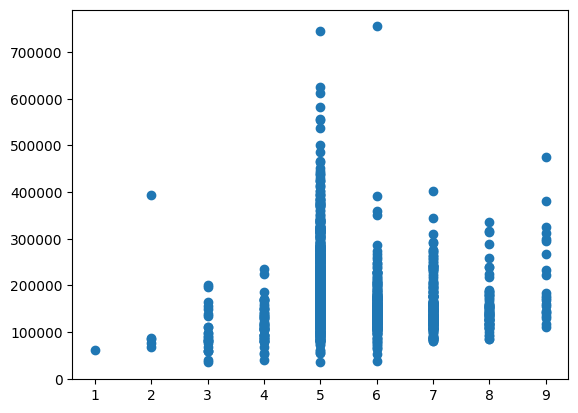

In [14]:
plt.scatter(data = train_df, x = 'OverallCond', y = 'SalePrice')

In [15]:
train_df.query('OverallCond == 2')
# Drop 379

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
88    89          50  C (all)        105.0     8470   Pave   NaN      IR1   
250  251          30       RL         55.0     5350   Pave   NaN      IR1   
378  379          20       RL         88.0    11394   Pave   NaN      Reg   
398  399          30       RM         60.0     8967   Pave   NaN      Reg   
676  677          70       RM         60.0     9600   Pave  Grvl      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
88          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
250         Lvl    AllPub  ...        0    NaN   GdWo        Shed     450   
378         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
398         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
676         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
88      10   2009     ConLD        Abnorml      85000  
250      5   2010        WD         Normal      76500  
378      6   2010       New        Partial     394432  
398     11   2007        WD        Abnorml      67000  
676      5   2006        WD         Normal      87000  

[5 rows x 81 columns]

In [16]:
train_df.query('OverallCond == 5 and SalePrice > 700000')
# Drop 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1182      7   2007        WD        Abnorml     745000  

[1 rows x 81 columns]

In [17]:
train_df.query('OverallCond == 6 and SalePrice > 700000')
# Drop 692

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  692          60       RL        104.0    21535   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
691         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
691      1   2007        WD         Normal     755000  

[1 rows x 81 columns]

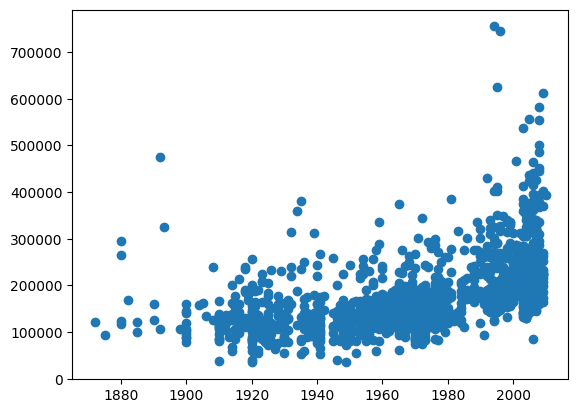

In [18]:
plt.scatter(data = train_df, x = 'YearBuilt', y = 'SalePrice')

In [19]:
stats.zscore(train_df['YearBuilt']).sort_values().tail(10)

212     1.249718
412     1.249718
211     1.249718
87      1.249718
1165    1.249718
898     1.249718
515     1.249718
157     1.249718
762     1.249718
378     1.282839
Name: YearBuilt, dtype: float64

In [20]:
# Even though all the samples are within 2 standard deviations, there are a few that need to be dropped anyway
train_df.query('YearBuilt < 1900 & SalePrice > 400000')
# Drop 186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0    22950   Pave   NaN      IR2   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
185         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
185      6   2006        WD         Normal     475000  

[1 rows x 81 columns]

In [21]:
train_df.query('YearBuilt > 1980 & YearBuilt < 2000 & SalePrice > 550000')
# Drop 692, 1170, 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
1169      7   2006        WD         Normal     625000  
1182      7   2007        WD        Abnorml     745000  

[3 rows x 81 columns]

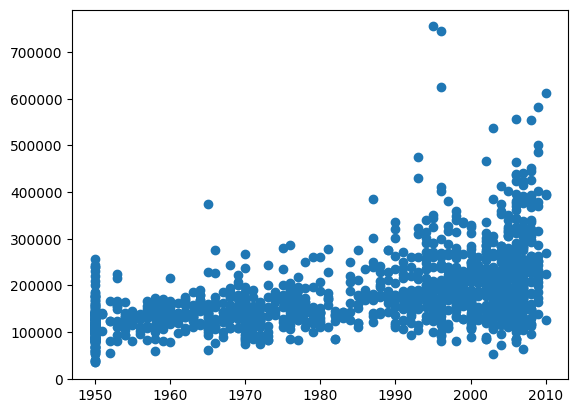

In [22]:
plt.scatter(data = train_df, x = 'YearRemodAdd', y = 'SalePrice')

In [23]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')
# Drop 314

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
313  314          20       RL        150.0   215245   Pave   NaN      IR3   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
313         Low    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
313      6   2009        WD         Normal     375000  

[1 rows x 81 columns]

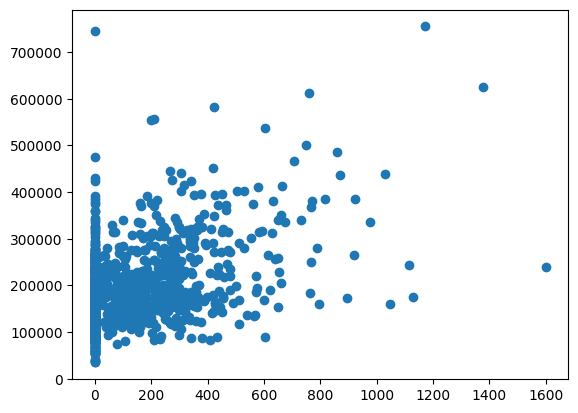

In [24]:
plt.scatter(data=train_df, x = 'MasVnrArea', y = 'SalePrice')

In [25]:
stats.zscore(train_df['MasVnrArea'].notna()).sort_values().tail(10)
# Good example of why zscore doesn't always work well, not a very high correlation between the variables

487     0.074227
486     0.074227
485     0.074227
484     0.074227
483     0.074227
482     0.074227
481     0.074227
480     0.074227
478     0.074227
1459    0.074227
Name: MasVnrArea, dtype: float64

In [26]:
train_df.query('MasVnrArea > 1500 & SalePrice > 200000')
# Drop 298

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
297  298          60       FV         66.0     7399   Pave  Pave      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
297         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
297      6   2007        WD         Normal     239000  

[1 rows x 81 columns]

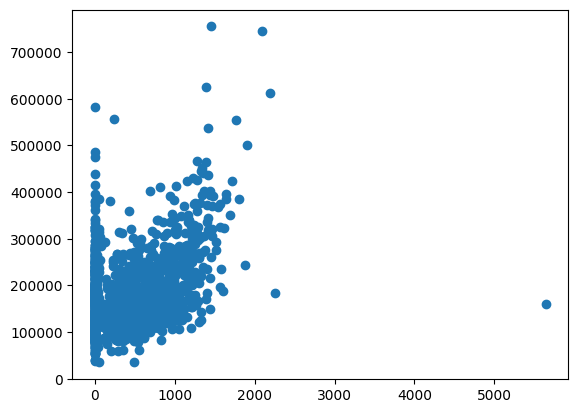

In [27]:
plt.scatter(data=train_df, x = 'BsmtFinSF1', y = 'SalePrice')

In [28]:
train_df.query('BsmtFinSF1 > 5000')
# Drop 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

In [29]:
stats.zscore(train_df['BsmtFinSF1']).sort_values().tail()

178      3.202953
1182     3.624059
898      3.825839
523      3.983754
1298    11.405753
Name: BsmtFinSF1, dtype: float64

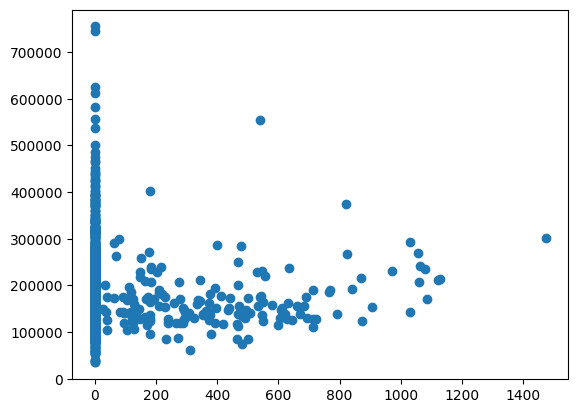

In [30]:
plt.scatter(data=train_df, x = 'BsmtFinSF2', y = 'SalePrice')

In [31]:
train_df.query('SalePrice > 500000 & BsmtFinSF2 > 400')
# Drop 441

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
440  441          20       RL        105.0    15431   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
440         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
440      4   2009        WD         Normal     555000  

[1 rows x 81 columns]

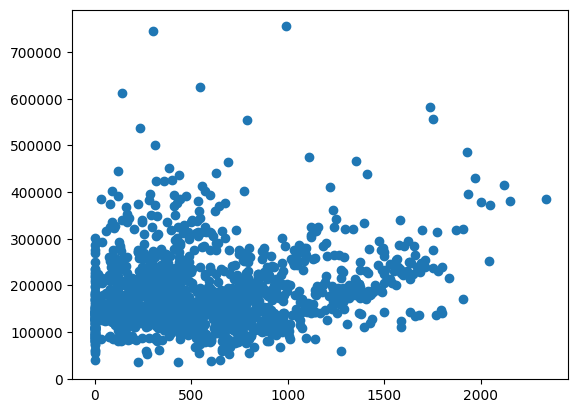

In [32]:
plt.scatter(data=train_df, x = 'BsmtUnfSF', y = 'SalePrice')

In [33]:
train_df.query('BsmtUnfSF > 500 & SalePrice > 700000')
# 692

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  692          60       RL        104.0    21535   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
691         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
691      1   2007        WD         Normal     755000  

[1 rows x 81 columns]

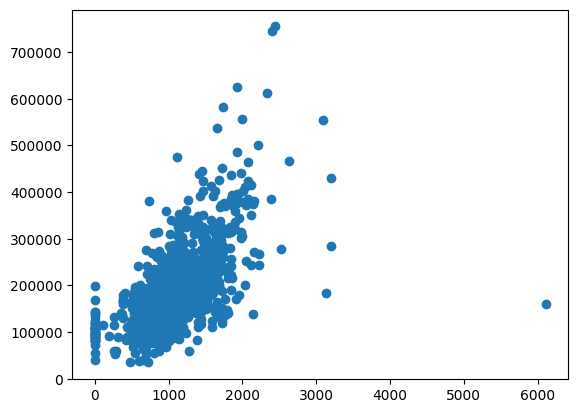

In [34]:
plt.scatter(data=train_df, x = 'TotalBsmtSF', y = 'SalePrice')


In [35]:
train_df.query('TotalBsmtSF > 5000')
# 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

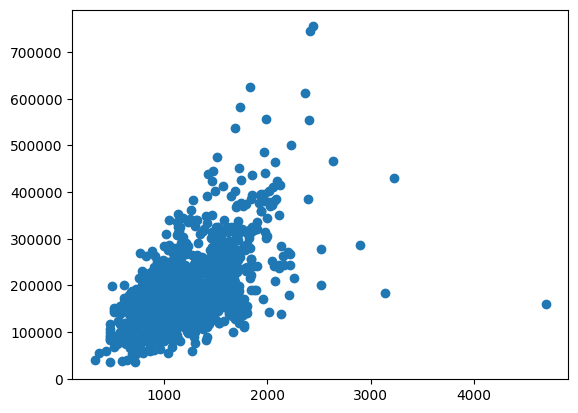

In [36]:
plt.scatter(data=train_df, x = '1stFlrSF', y = 'SalePrice')

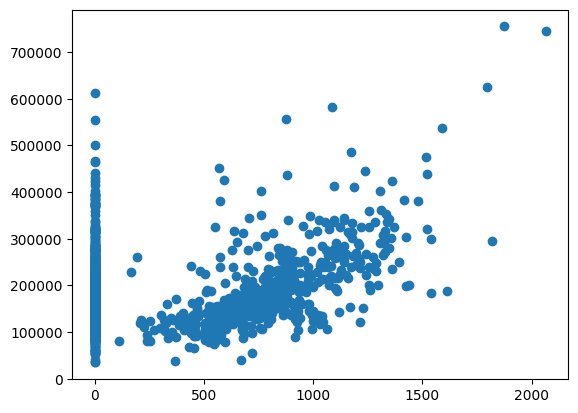

In [37]:
plt.scatter(data=train_df, x = '2ndFlrSF', y = 'SalePrice')

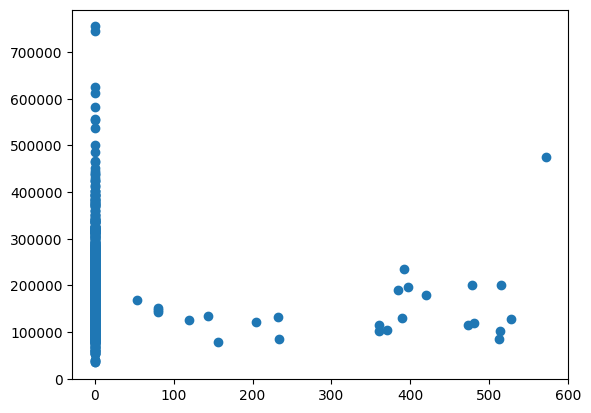

In [38]:
plt.scatter(data=train_df, x = 'LowQualFinSF', y = 'SalePrice')

In [39]:
train_df.query('LowQualFinSF > 500 & SalePrice > 400000')
# 186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0    22950   Pave   NaN      IR2   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
185         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
185      6   2006        WD         Normal     475000  

[1 rows x 81 columns]

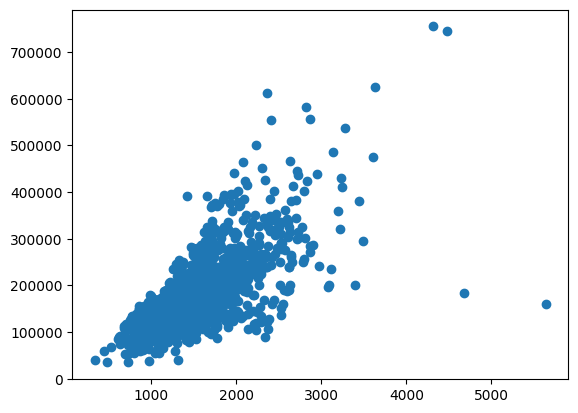

In [40]:
plt.scatter(data=train_df, x = 'GrLivArea', y = 'SalePrice')

In [41]:
train_df.query('GrLivArea > 4000 & SalePrice < 300000')
# 524 and 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
523          Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
523      10   2007       New        Partial     184750  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]

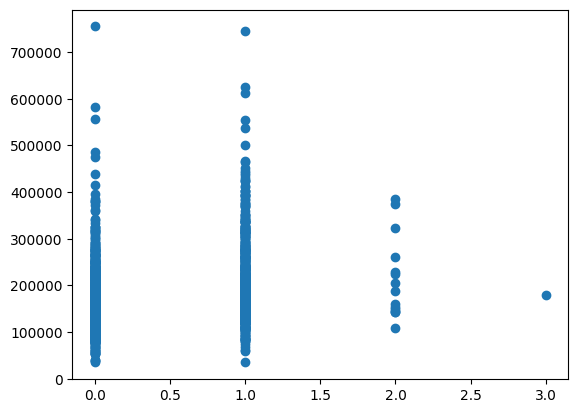

In [42]:
plt.scatter(data=train_df, x = 'BsmtFullBath', y = 'SalePrice')

In [43]:
train_df.query('BsmtFullBath == 3')
#739

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
738  739          90       RL         60.0    10800   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
738         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
738      3   2009        WD         Alloca     179000  

[1 rows x 81 columns]

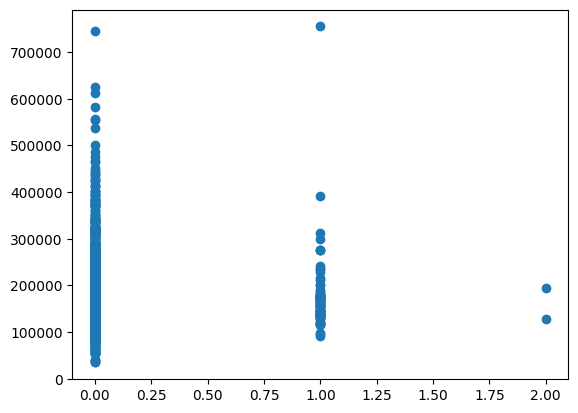

In [44]:
plt.scatter(data=train_df, x = 'BsmtHalfBath', y = 'SalePrice')

In [45]:
train_df.query('BsmtHalfBath == 2')
# 598 and 955

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
597  598         120       RL         53.0     3922   Pave   NaN      Reg   
954  955          90       RL         35.0     9400   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
597         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
954         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
597      2   2007       New        Partial     194201  
954     10   2006        WD        AdjLand     127500  

[2 rows x 81 columns]

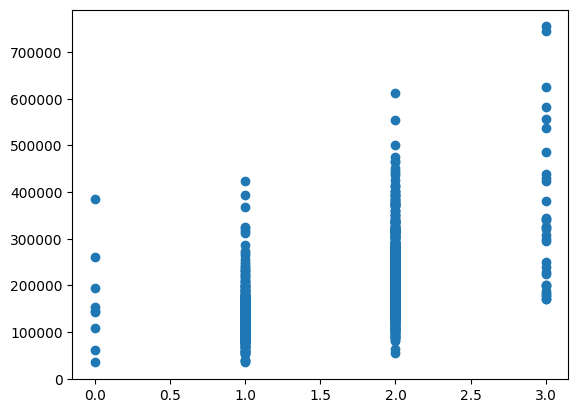

In [46]:
plt.scatter(data=train_df, x = 'FullBath', y = 'SalePrice')

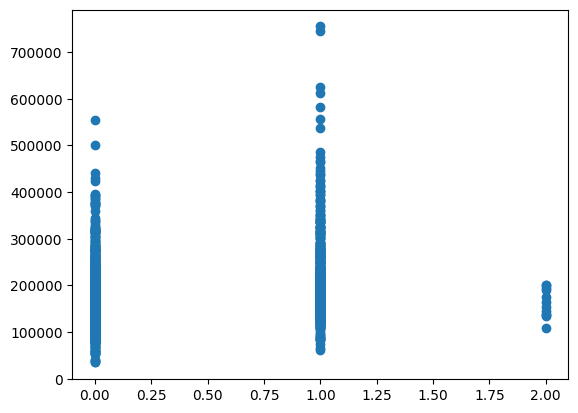

In [47]:
plt.scatter(data=train_df, x = 'HalfBath', y = 'SalePrice')

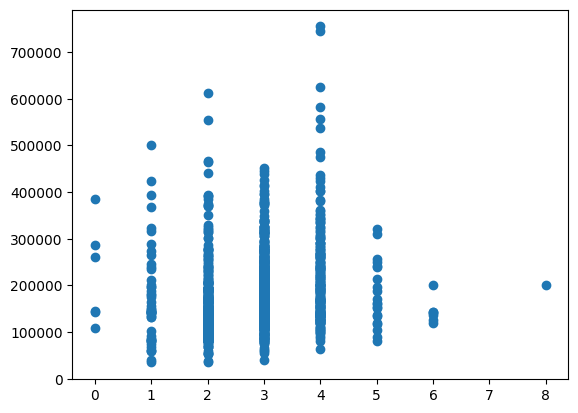

In [48]:
plt.scatter(data=train_df, x = 'BedroomAbvGr', y = 'SalePrice')

In [49]:
train_df.query('BedroomAbvGr == 8')
#636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
635  636         190       RH         60.0    10896   Pave  Pave      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
635         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
635      3   2007        WD        Abnorml     200000  

[1 rows x 81 columns]

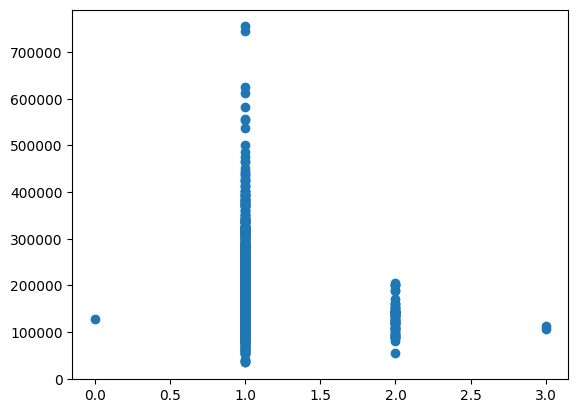

In [50]:
plt.scatter(data=train_df, x = 'KitchenAbvGr', y = 'SalePrice')

In [51]:
train_df.query('KitchenAbvGr == 3')
# 49 and 810

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48    49         190       RM         33.0     4456   Pave   NaN      Reg   
809  810          75       RM         90.0     8100   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
48          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
809         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
48       6   2009       New        Partial     113000  
809     11   2009        WD         Normal     106000  

[2 rows x 81 columns]

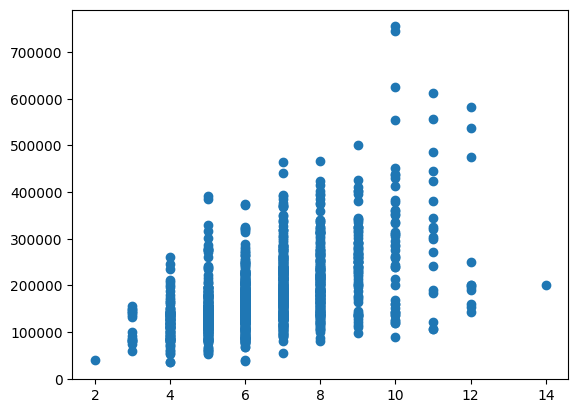

In [52]:
plt.scatter(data=train_df, x = 'TotRmsAbvGrd', y = 'SalePrice')

In [53]:
train_df.query('SalePrice > 700000')
# 692 and 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
1182      7   2007        WD        Abnorml     745000  

[2 rows x 81 columns]

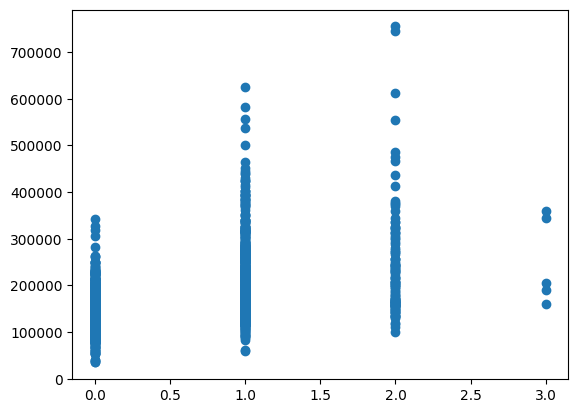

In [54]:
plt.scatter(data=train_df, x = 'Fireplaces', y = 'SalePrice')

In [55]:
train_df.query('Fireplaces ==3')
# maybe drop 167, 310, 606, 643 and def 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
166    167          20       RL          NaN    10708   Pave   NaN      IR1   
309    310          20       RL         90.0    12378   Pave   NaN      IR1   
605    606          60       RL         85.0    13600   Pave   NaN      Reg   
642    643          80       RL         75.0    13860   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
166          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
309          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
605          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
642          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
166      11   2009       COD         Normal     190000  
309      11   2006        WD         Normal     360000  
605      10   2009        WD         Normal     205000  
642       7   2009        WD         Normal     345000  
1298      1   2008       New        Partial     160000  

[5 rows x 81 columns]

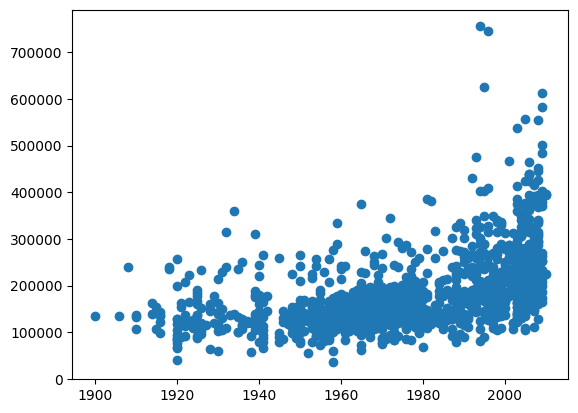

In [56]:
plt.scatter(data=train_df, x = 'GarageYrBlt', y = 'SalePrice')

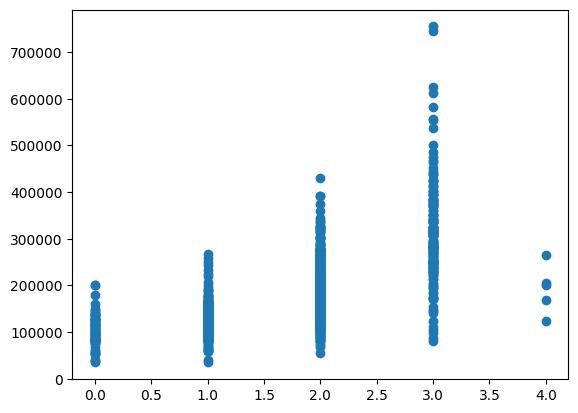

In [57]:
plt.scatter(data=train_df, x = 'GarageCars', y = 'SalePrice')

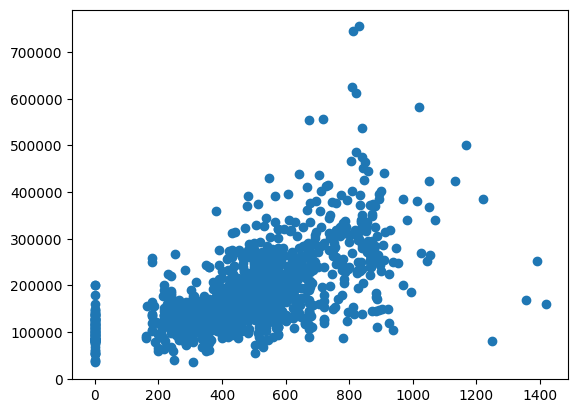

In [58]:
plt.scatter(data=train_df, x = 'GarageArea', y = 'SalePrice')

In [59]:
train_df.query('SalePrice < 300000 & GarageArea > 1200')
# 1299, 1191, 1062, 582

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
581    582          20       RL         98.0    12704   Pave   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
581          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1061         Low    AllPub  ...        0    NaN   NaN        Shed     560   
1190         Low    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
581       8   2009       New        Partial     253293  
1061      8   2008     ConLD         Normal      81000  
1190      3   2007        WD         Normal     168000  
1298      1   2008       New        Partial     160000  

[4 rows x 81 columns]

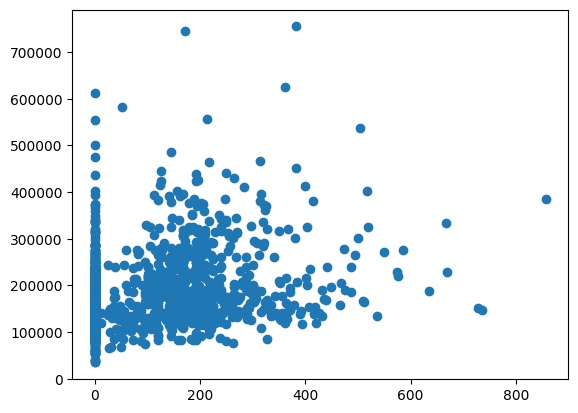

In [60]:
plt.scatter(data=train_df, x = 'WoodDeckSF', y = 'SalePrice')

In [61]:
train_df.query('SalePrice > 550000 & WoodDeckSF < 200 and WoodDeckSF > 0')
# 804, 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
803    804          60       RL        107.0    13891   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
803          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
803       1   2009       New        Partial     582933  
1182      7   2007        WD        Abnorml     745000  

[2 rows x 81 columns]

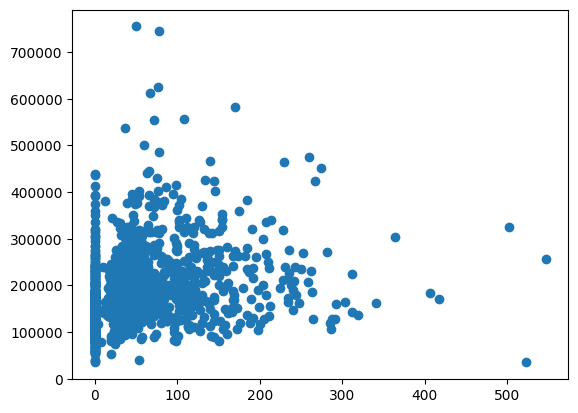

In [62]:
plt.scatter(data=train_df, x = 'OpenPorchSF', y = 'SalePrice')

In [63]:
train_df.query('OpenPorchSF > 500')
# 496

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   
583    584          75       RM         75.0    13500   Pave   NaN      Reg   
1328  1329          50       RM         60.0    10440   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
495          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
583          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1328         Lvl    AllPub  ...        0    NaN  MnPrv        Shed    1150   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
495      11   2009        WD        Abnorml      34900  
583       7   2008        WD         Normal     325000  
1328      6   2008        WD         Normal     256000  

[3 rows x 81 columns]

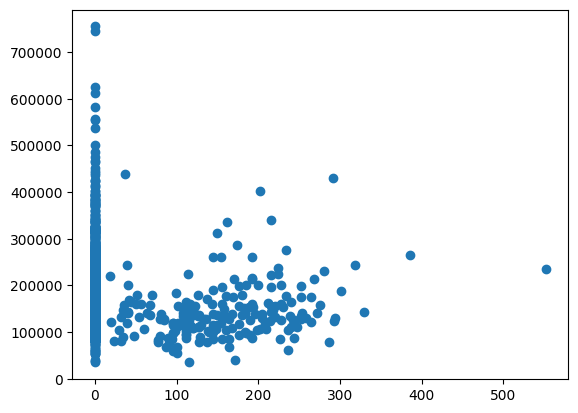

In [64]:
plt.scatter(data=train_df, x = 'EnclosedPorch', y = 'SalePrice')

In [65]:
train_df.query('EnclosedPorch < 100 & SalePrice > 400000 & EnclosedPorch > 0')
# 59

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58  59          60       RL         66.0    13682   Pave   NaN      IR2   

   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
58         HLS    AllPub  ...        0    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
58     10   2006       New        Partial     438780  

[1 rows x 81 columns]

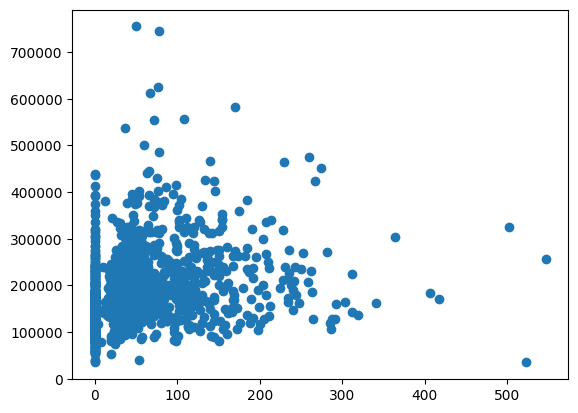

In [66]:
plt.scatter(data=train_df, x = 'OpenPorchSF', y = 'SalePrice')

In [67]:
train_df.query('SalePrice < 100000 & OpenPorchSF > 500')
# 496

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
495  496          30  C (all)         60.0     7879   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
495         Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
495     11   2009        WD        Abnorml      34900  

[1 rows x 81 columns]

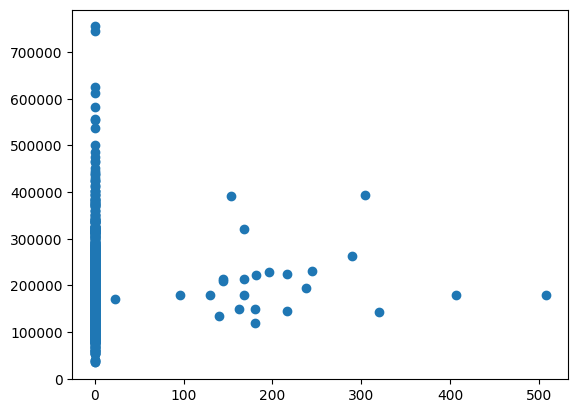

In [68]:
plt.scatter(data=train_df, x = '3SsnPorch', y = 'SalePrice')

In [69]:
stats.zscore(train_df['3SsnPorch']!=0).unique()
# 206, 56, 6, 1438 

array([-0.12927912,  7.73520092])

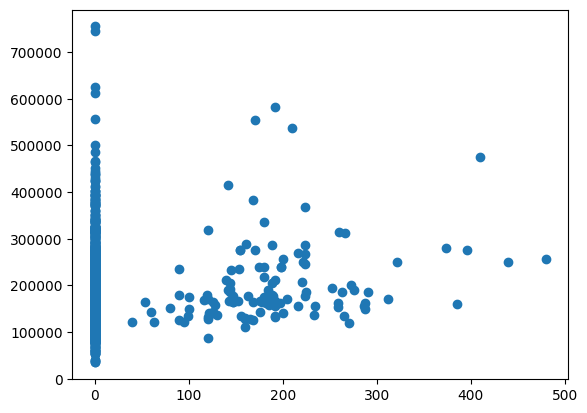

In [70]:
plt.scatter(data=train_df, x = 'ScreenPorch', y = 'SalePrice')

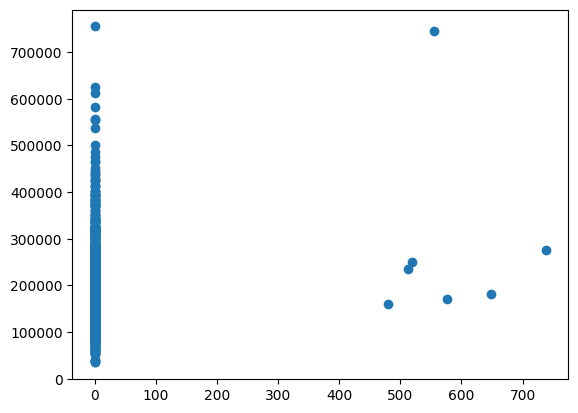

In [71]:
plt.scatter(data=train_df, x = 'PoolArea', y = 'SalePrice')

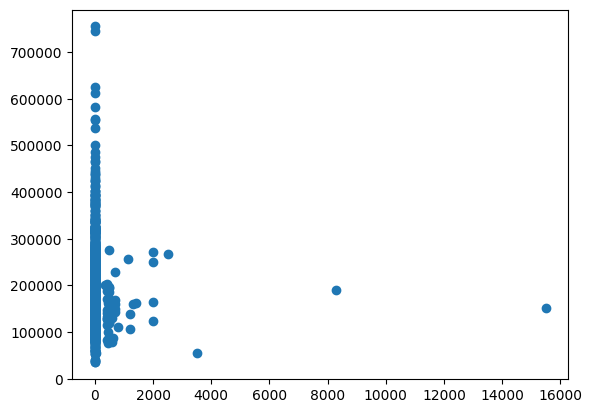

In [72]:
plt.scatter(data=train_df, x = 'MiscVal', y = 'SalePrice')

In [73]:
train_df.query('MiscVal > 3000')
# 347, 706, 1231 maybe??

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
346    347          20       RL          NaN    12772   Pave   NaN      IR1   
705    706         190       RM         70.0     5600   Pave   NaN      Reg   
1230  1231          90       RL          NaN    18890   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
346          Lvl    AllPub  ...        0    NaN   NaN        Gar2   15500   
705          Lvl    AllPub  ...        0    NaN   NaN        Othr    3500   
1230         Lvl    AllPub  ...        0    NaN   NaN        Gar2    8300   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
346       4   2007        WD         Normal     151500  
705       7   2010        WD         Normal      55000  
1230      8   2007        WD         Normal     190000  

[3 rows x 81 columns]

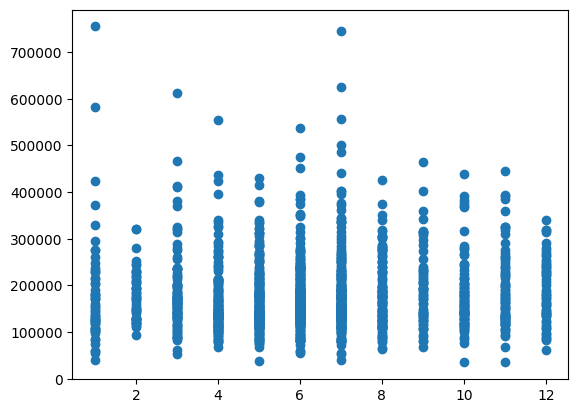

In [74]:
plt.scatter(data=train_df, x = 'MoSold', y = 'SalePrice')

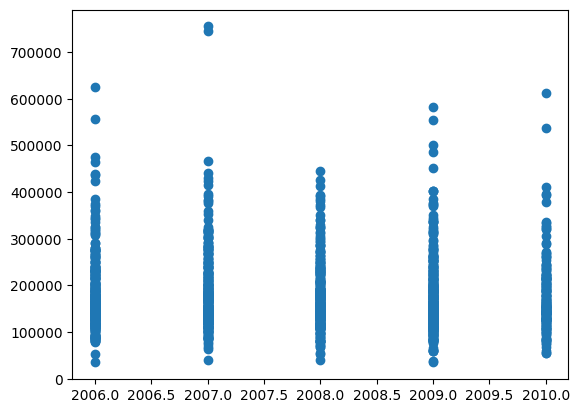

In [75]:
plt.scatter(data=train_df, x = 'YrSold', y = 'SalePrice')

In [76]:
train_df.query('YrSold == 2010 & SalePrice > 500000')
# 770, 899

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
769  770          60       RL         47.0    53504   Pave   NaN      IR2   
898  899          20       RL        100.0    12919   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
769         HLS    AllPub  ...        0    NaN   NaN         NaN       0   
898         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
769      6   2010        WD         Normal     538000  
898      3   2010       New        Partial     611657  

[2 rows x 81 columns]

In [77]:
outliers = [935, 250, 314, 336, 707, 452, 1299, 524, 379, 1183, 692, 186, 1170, 298, 441, 739, 598, 955, 636, 49, 810, 167, 310, 606, 643, 1191, 1062, 582, 804, 496, 59, 206, 56, 6, 1438, 47, 606, 1231, 770, 899]

In [78]:
train_df = train_df[train_df.Id.isin(outliers)==False]

In [79]:
# to see which features have null values
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

0
PoolQC        1416
MiscFeature   1372
Alley         1332
Fence         1147
MasVnrType     853
FireplaceQu    681
LotFrontage    253
GarageYrBlt     76
GarageCond      76
GarageType      76
GarageFinish    76
GarageQual      76
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
Electrical       1
Id               0

In [80]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [81]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [82]:
train_df['Alley'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)

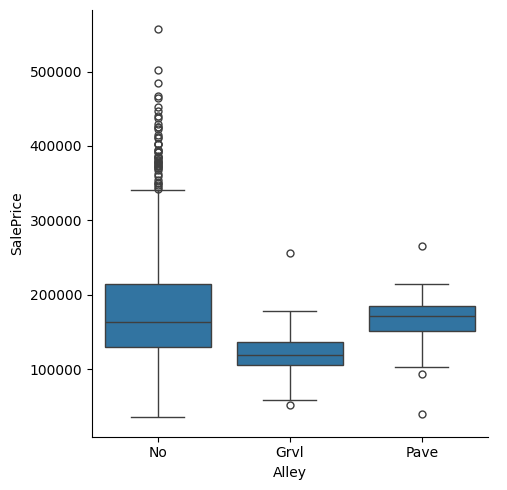

In [83]:
sns.catplot(data=train_df, x='Alley', y='SalePrice', kind='box')

In [84]:
train_df['Fence'].unique()

array([nan, 'GdWo', 'GdPrv', 'MnPrv', 'MnWw'], dtype=object)

In [85]:
train_df['Fence'].fillna('No', inplace=True)
test_df['Fence'].fillna('No', inplace=True)

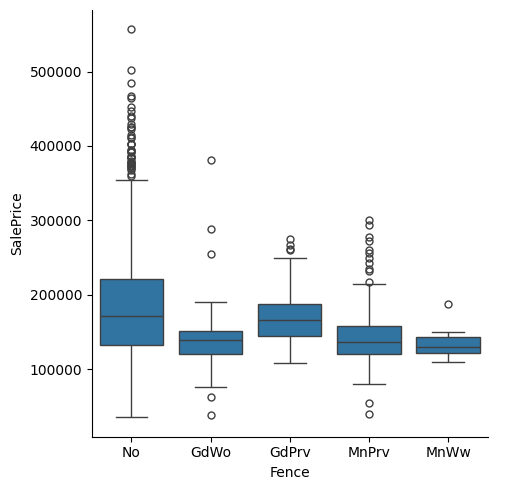

In [86]:
sns.catplot(data=train_df, x='Fence', y='SalePrice', kind='box')

In [87]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [88]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

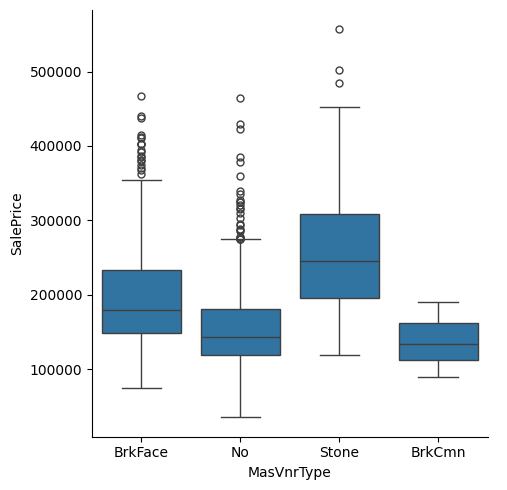

In [89]:
sns.catplot(data=train_df, x='MasVnrType', y='SalePrice', kind='box')

In [90]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

In [91]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [92]:
train_df['FireplaceQu'].fillna('No', inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)

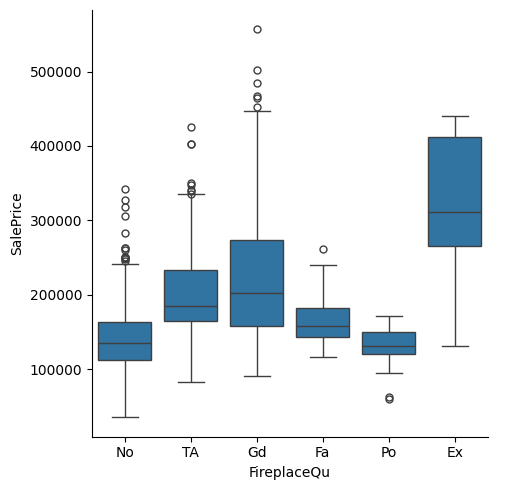

In [93]:
sns.catplot(data=train_df, x='FireplaceQu', y='SalePrice', kind='box')

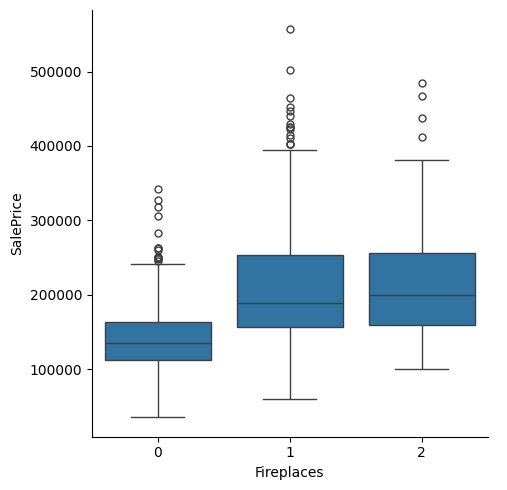

In [94]:
sns.catplot(data=train_df, x='Fireplaces', y='SalePrice', kind='box')

In [95]:
train_df['LotFrontage'].fillna(0, inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)

In [96]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])
# checking the correlation to see if you can just assume that the garage was built the same year as the house and thus can just drop the column

0.8270655334376424

In [97]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [98]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

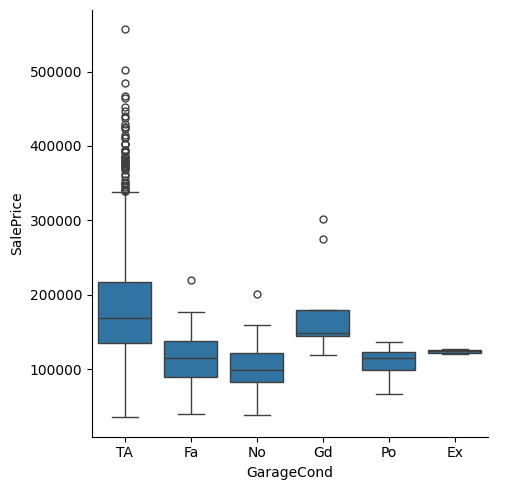

In [99]:
sns.catplot(data=train_df, x='GarageCond', y='SalePrice', kind='box')

In [100]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [101]:
train_df['GarageType'].fillna('None', inplace=True)
test_df['GarageType'].fillna('None', inplace=True)

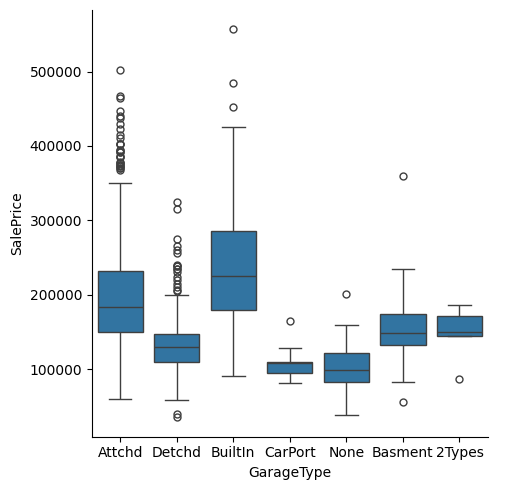

In [102]:
sns.catplot(data=train_df, x='GarageType', y='SalePrice', kind='box')

In [103]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [104]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

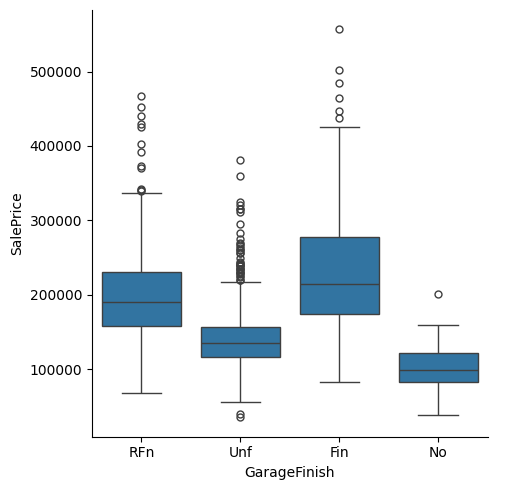

In [105]:
sns.catplot(data=train_df, x='GarageFinish', y='SalePrice', kind='box')

In [106]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [107]:
train_df['GarageQual'].fillna('None', inplace=True)
test_df['GarageQual'].fillna('None', inplace=True)

In [108]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [109]:
train_df['BsmtFinType2'].fillna('None', inplace=True)
test_df['BsmtFinType2'].fillna('None', inplace=True)

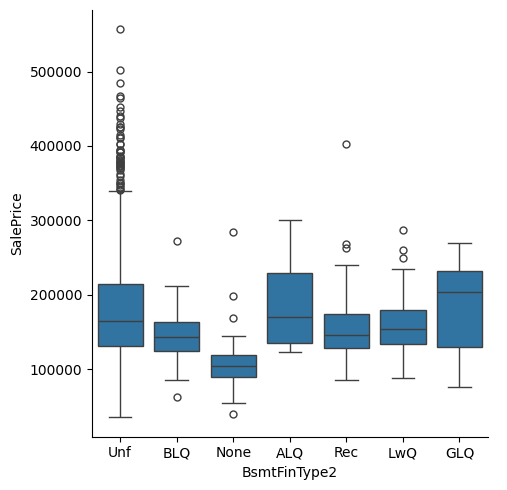

In [110]:
sns.catplot(data=train_df, x='BsmtFinType2', y='SalePrice', kind='box')

In [111]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [112]:
train_df['BsmtExposure'].fillna('NoBsmt', inplace=True)
test_df['BsmtExposure'].fillna('NoBsmt', inplace=True)

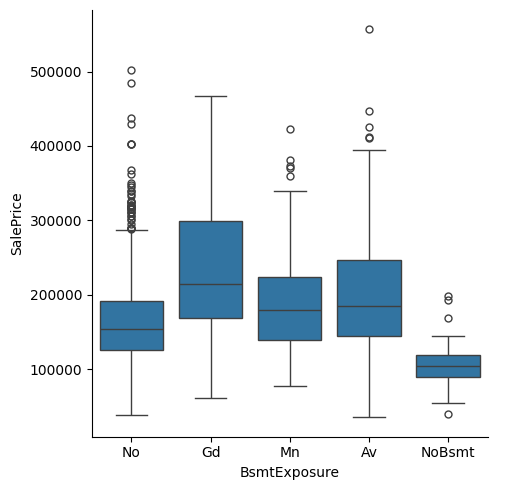

In [113]:
sns.catplot(data=train_df, x='BsmtExposure', y='SalePrice', kind='box')

In [114]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [115]:
train_df['BsmtQual'].fillna('NoBsmt', inplace=True)
test_df['BsmtQual'].fillna('NoBsmt', inplace=True)

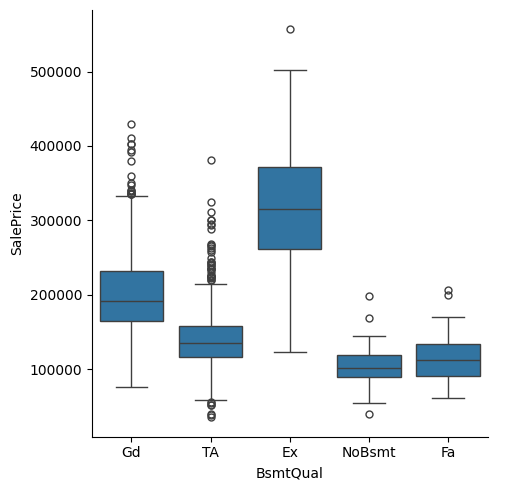

In [116]:
sns.catplot(data=train_df, x='BsmtQual', y='SalePrice', kind='box')

In [117]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [118]:
train_df['BsmtCond'].fillna('NoBsmt', inplace=True)
test_df['BsmtCond'].fillna('NoBsmt', inplace=True)

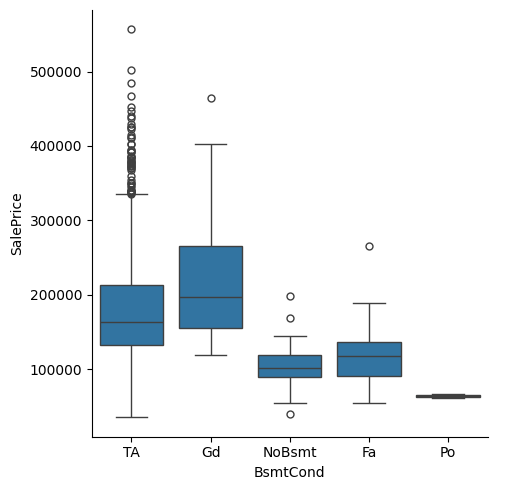

In [119]:
sns.catplot(data=train_df, x='BsmtCond', y='SalePrice', kind='box')

In [120]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [121]:
train_df['BsmtFinType1'].fillna('NoBsmt', inplace=True)
test_df['BsmtFinType1'].fillna('NoBsmt', inplace=True)

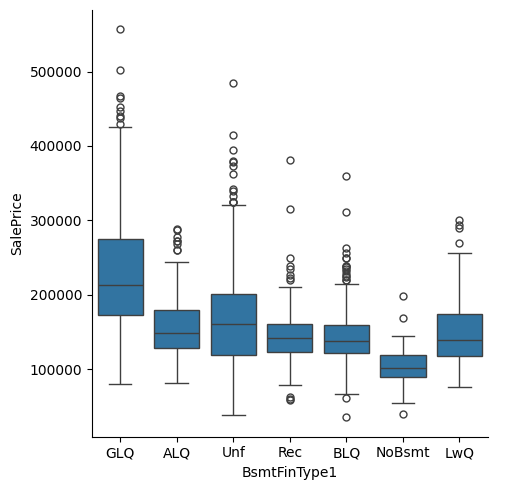

In [122]:
sns.catplot(data=train_df, x='BsmtFinType1', y='SalePrice', kind='box')

In [123]:
train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [124]:
train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

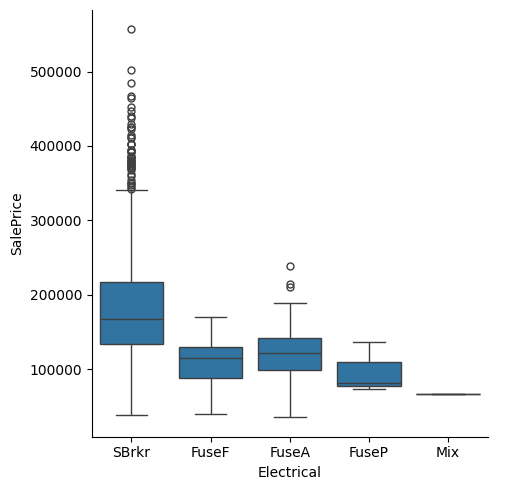

In [125]:
sns.catplot(data=train_df, x='Electrical', y='SalePrice', kind='box')

In [126]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'BsmtExposure', 'Electrical', 'BsmtFinType2'], axis=1)
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'BsmtExposure', 'Electrical', 'BsmtFinType2'], axis=1)

### **Feature Engineering**

In [127]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']

In [128]:
train_df['hosueremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']

In [129]:
train_df['totalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']

In [130]:
train_df['totalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']

In [131]:
train_df['totalBaths'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']*0.5 + train_df['FullBath'] + train_df['HalfBath']*0.5

In [132]:
train_df['totalPorchSF'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']

In [133]:
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [134]:
test_df['hosueremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [135]:
test_df['totalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [136]:
test_df['totalArea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [137]:
test_df['totalBaths'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']*0.5 + test_df['FullBath'] + test_df['HalfBath']*0.5

In [138]:
test_df['totalPorchSF'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

#### drop some more columns

In [139]:
train_df = train_df.drop(columns=['Id'], axis=1)
# test_df = test_df.drop(columns=['Id'], axis=1) DON'T DO THIS!!

<Axes: >

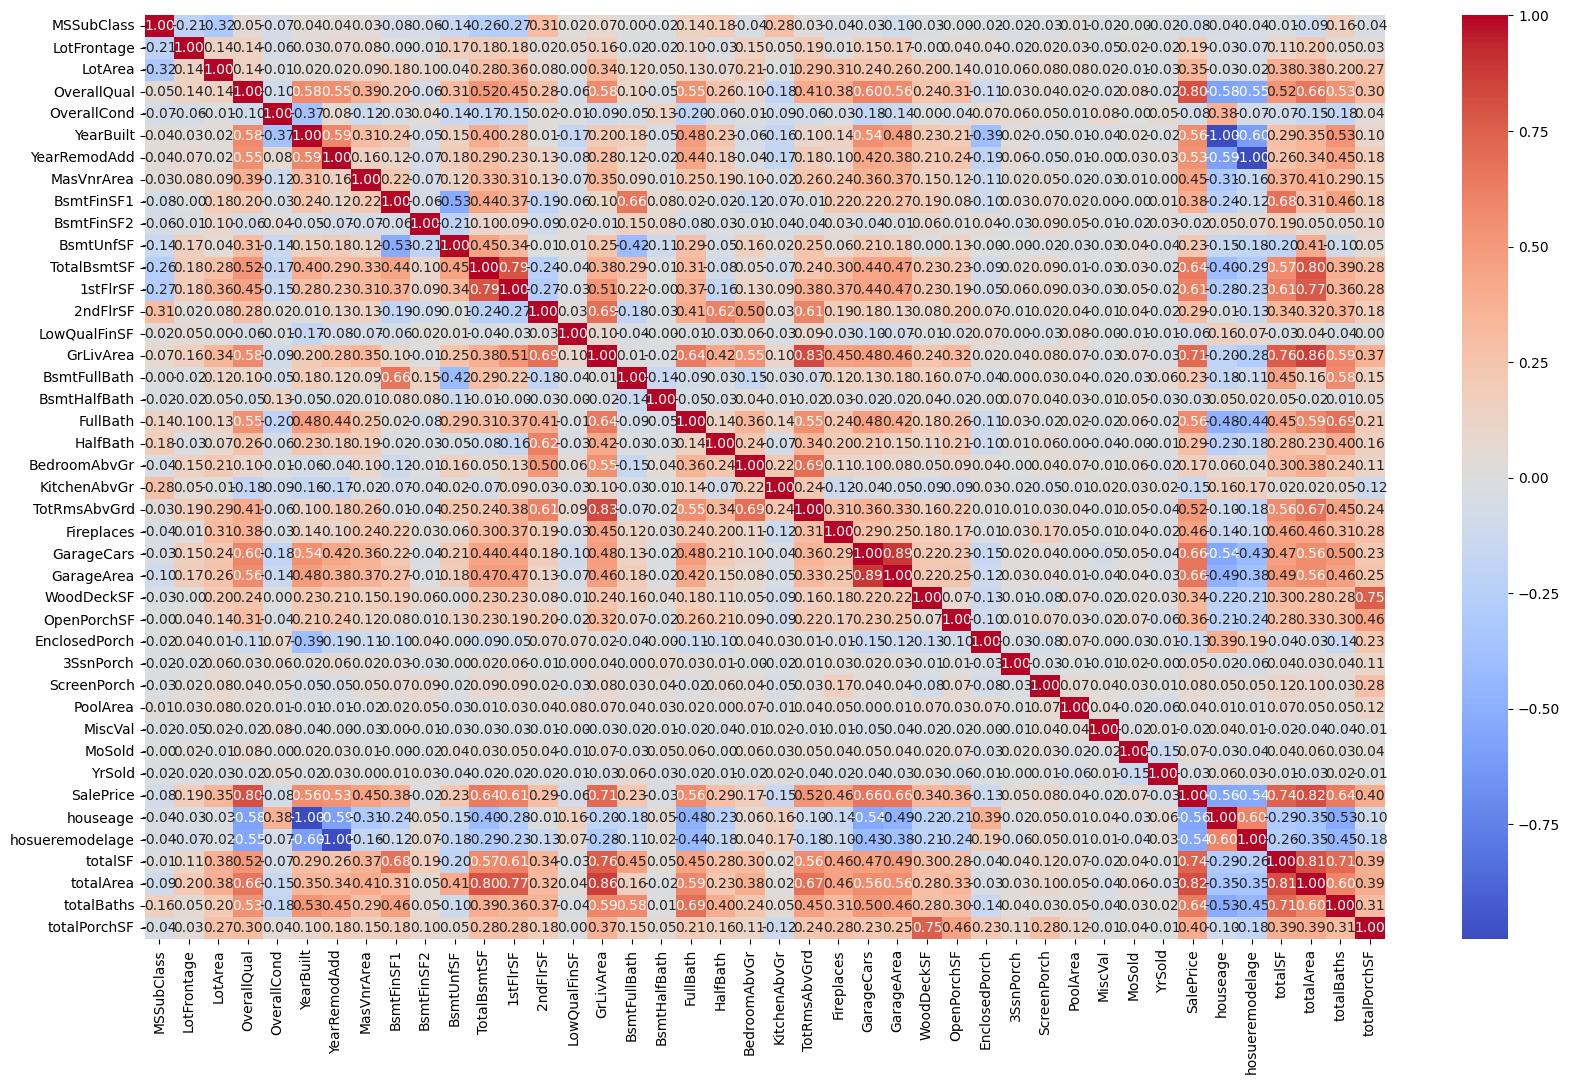

In [140]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt='.2f')

^ You want to drop columns with high correlation in order to prevent overfitting, I'm going to try it both ways

### **More EDA**

<Axes: xlabel='SalePrice', ylabel='Count'>

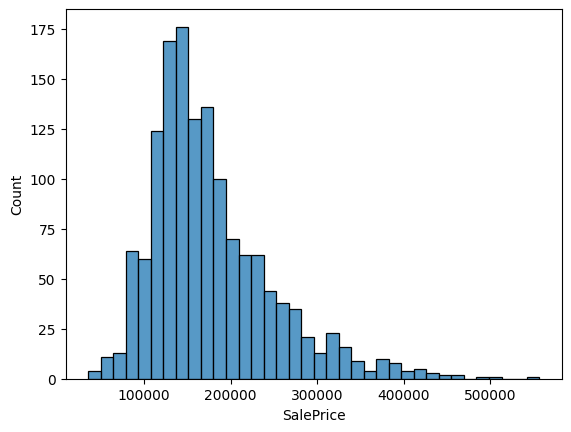

In [141]:
sns.histplot(data=train_df, x='SalePrice')

^ clear right skew, use `np.logp1` to normalize the `SalePrice` (logarithms give equal weight to high and low values cause they're the inverse of exponential growth)

In [142]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

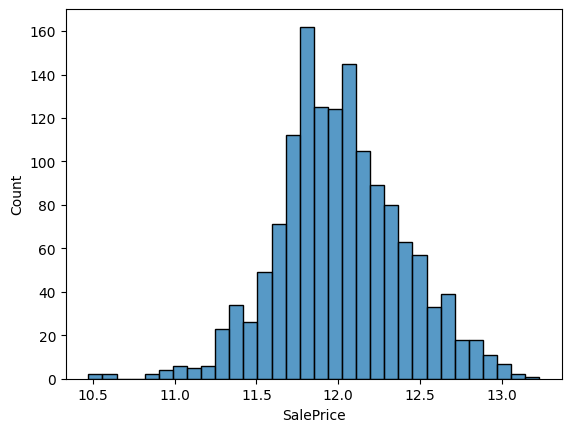

In [143]:
sns.histplot(data=train_df, x='SalePrice')

^ you can see that it is much closer to a normal distribution

### **Making a Pipeline**

In [144]:
# seeing what's categorical
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [145]:
# seeing what's not categorical
train_df.dtypes[train_df.dtypes!='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
MasVnrArea         float64
BsmtFinSF1           int64
BsmtFinSF2           int64
BsmtUnfSF            int64
TotalBsmtSF          int64
1stFlrSF             int64
2ndFlrSF             int64
LowQualFinSF         int64
GrLivArea            int64
BsmtFullBath         int64
BsmtHalfBath         int64
FullBath             int64
HalfBath             int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
GarageArea           int64
WoodDeckSF           int64
OpenPorchSF          int64
EnclosedPorch        int64
3SsnPorch            int64
ScreenPorch          int64
PoolArea             int64
MiscVal              int64
MoSold               int64
YrSold               int64
SalePrice          float64
houseage             int64
h

In [146]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [147]:
# one hot encoding categorical columns, order doesn't matter and all categories and same value
ohe_cols = ['MSZoning', 'Street', 'LotConfig', 'Neighborhood','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','SaleType','SaleCondition']

In [148]:
# ordinal encoding categorical columns, order matters (there is inherant ranking in the categories)
ord_cols = ['LotShape', 'LandContour', 'Utilities','LandSlope','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [149]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [150]:
ord_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [151]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [152]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ord_p', ord_pipeline, ord_cols),
    ('ohe_p', ohe_pipeline, ohe_cols)
], remainder='passthrough', n_jobs=-1)

In [153]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [154]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [155]:
X_preprocessed = pipeline.fit_transform(X)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

### **build models**

#### Linear Regression

In [157]:
lr = LinearRegression()

In [158]:
lr.fit(X_train, y_train)

LinearRegression()

In [159]:
y_pred_lr = lr.predict(X_test)

In [160]:
mean_squared_error(y_test, y_pred_lr)

5.725628257576311e+19

^ poop

#### Random Forest Regression

In [161]:
RFR = RandomForestRegressor(random_state=13)

In [162]:
parameters_rfr = {
    'max_depth':[5, 10, 15],
    'n_estimators':[100, 250, 500],
    'min_samples_split':[3,5,10]
}

In [163]:
rfr_cv = GridSearchCV(
    RFR,
    param_grid=parameters_rfr,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

In [164]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [165]:
# mean squared error
np.sqrt(-1*rfr_cv.best_score_)

0.13429223405470972

In [166]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 250}

#### XGB Regression

In [167]:
XGB = XGBRegressor(random_state=13)

In [168]:
parameters_xgb = {
    'learning_rate':[0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth':[3],
    'min_child_weight':[1,2,3],
    'gamma':[0,0.1, 0.2],
    'subsample':[0.8, 0.9, 1.0],
    'colsample_bytree':[0.8, 0.9, 1.0]
}

In [169]:
xgb_cv = GridSearchCV(
    XGB,
    param_grid=parameters_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

In [170]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [171]:
np.sqrt(-1*xgb_cv.best_score_)

0.11652657087066769

#### Ridge

In [172]:
ridge = Ridge()

In [173]:
parameters_ridge = {
    'alpha':[0.05, 0.1, 1, 3, 5, 10],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'],
}

In [174]:
ridge_cv = GridSearchCV(
    param_grid=parameters_ridge,
    cv = 5,
    estimator=ridge,
    scoring = 'neg_mean_squared_error',
    n_jobs=-1
)

In [175]:
ridge_cv.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [176]:
np.sqrt(-1*ridge_cv.best_score_)

0.11344249777079135

#### Gradient Boosting Regressor

In [177]:
gbr = GradientBoostingRegressor()

In [178]:
parameters_gbr = {
    'max_depth':[12, 15, 20],
    'n_estimators':[200, 300, 1000],
    'min_samples_leaf':[10,25,50],
    'learning_rate':[0.001, 0.01, 0.1],
    'max_features':[0.01, 0.1, 0.7]
}

In [179]:
gbr_cv = GridSearchCV(
    estimator = gbr,
    param_grid=parameters_gbr,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5
)

In [180]:
gbr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [181]:
np.sqrt(-1*gbr_cv.best_score_)

0.11528148344769137

#### LGBM Regressor

In [182]:
lgbm = lgb.LGBMRegressor()

In [183]:
parameters_lgbm = {
    'boosting_type':['gbdt', 'dart'],
    'num_leaves':[20, 30, 40],
    'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators':[100, 200, 300]
}

In [184]:
lgbm_cv = GridSearchCV(
    cv = 3,
    estimator=lgbm,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    param_grid=parameters_lgbm
)

In [185]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3369
[LightGBM] [Info] Total Bins 3369
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 115
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 115
[LightGBM] [Info] Start training from score 12.006803[LightGBM] [Info] Start training from score 12.006803

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008367 seconds.
You can s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [186]:
np.sqrt(-1*lgbm_cv.best_score_)

0.12715608337422704

#### Catboost Regressor

In [187]:
catboost = CatBoostRegressor(
    loss_function = 'RMSE',
    verbose = False
)

In [188]:
parameters_cat = {
    'iterations':[100, 500, 1000],
    'depth':[4, 6, 8, 10],
    'learning_rate':[0.01, 0.05, 0.1, 0.5]
}

In [189]:
catboost_cv = GridSearchCV(
    cv = 3,
    estimator=catboost,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    param_grid=parameters_cat
)

In [190]:
catboost_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x15b3007a0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [191]:
np.sqrt(-1*catboost_cv.best_score_)

0.11430574331969133

#### Voting Regressor

In [194]:
vr = VotingRegressor([
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_)
], weights = [2, 3, 1])

In [195]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=20,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=3,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge', Ridge(alpha=10, solver='sparse_cg'))],
                weights=[2, 3, 1])

In [197]:
y_predict_vr = vr.predict(X_test)

In [198]:
root_mean_squared_error(y_test, y_predict_vr)

0.11443061872192327

#### Stacking Regression

In [192]:
estimators = [
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', catboost_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_)
]

In [199]:
stackreg = StackingRegressor(
    estimators=estimators,
    final_estimator= vr,
)

In [200]:
stackreg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3920
[LightGBM] [Info] Number of data points in the train set: 1136, number of used features: 123
[LightGBM] [Info] Start training from score 12.012246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3736
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 120
[LightGBM] [Info] Start training from score 12.009081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=20,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=3,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='sparse_cg'))],
                                                  weights=[2, 3, 1]))

In [201]:
y_predict_stack = stackreg.predict(X_test)

In [202]:
root_mean_squared_error(y_test, y_predict_stack)

0.12048275348226922

### **Making predictions**

In [203]:
df_test_preprocessed = pipeline.transform(test_df)

In [204]:
y_stacking = np.exp(stackreg.predict(df_test_preprocessed))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking
df_y_stacking_out.to_csv('FirstHousePredictions_08042024.csv', index=False)

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_14866/3858007681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking
